In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the mall dataset
dataset = pd.read_csv('data/Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

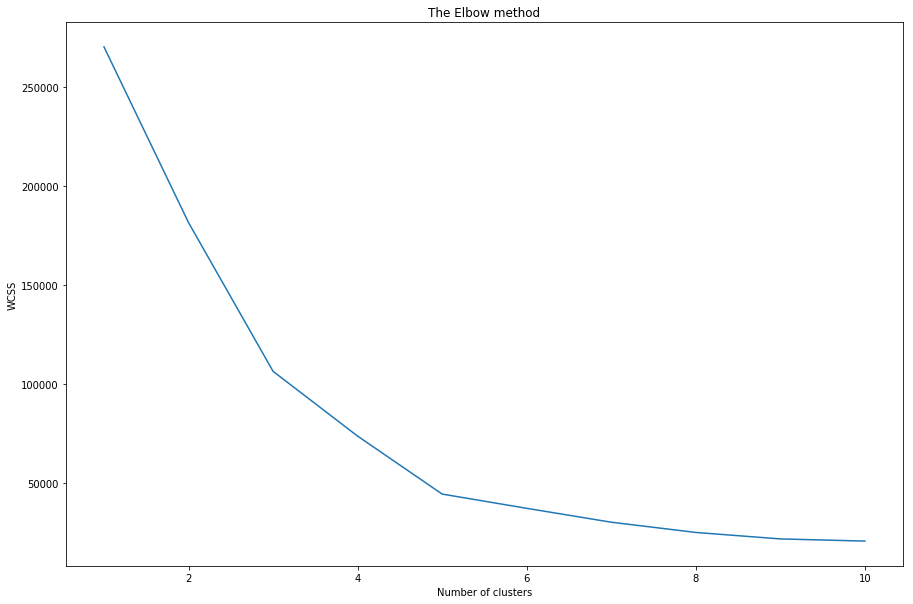

In [5]:
# using the elbow methd to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15, 10))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Let's choose the optimal number of clusters as 5
# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters=5, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

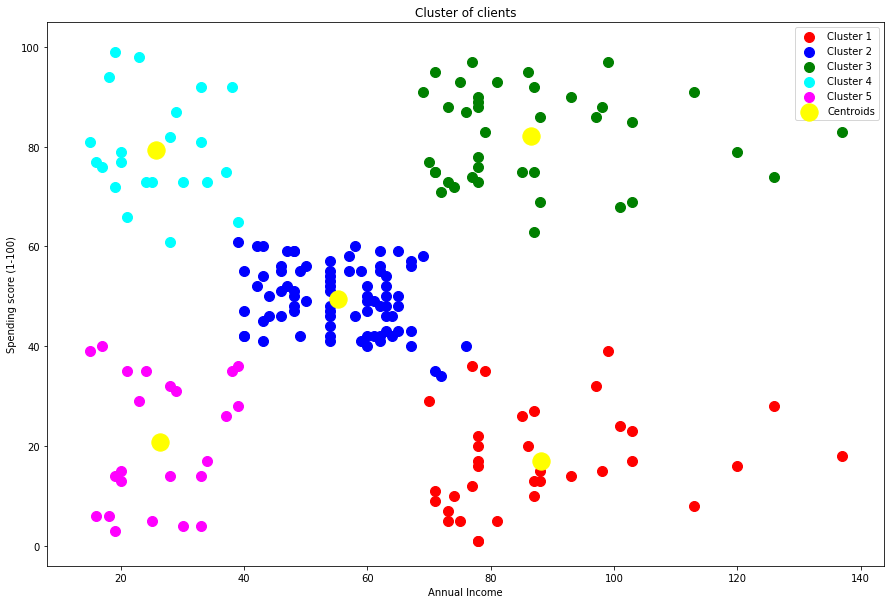

In [9]:
# Visualising the clusters
plt.figure(figsize=(15, 10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], 
            s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], 
            s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], 
            s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')
plt.title('Cluster of clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()